# Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset

In [2]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

# dataset
# X.shape

# Taking care of missing data

In [3]:
#from sklearn.preprocessing import Imputer
#imputer = Imputer(missing_values="NaN",strategy="mean",axis=0)
#imputer = imputer.fit(X[:,1:3])
#X[:,1:3] = imputer.transform(X[:,1:3])

# Encoding categorical data

In [4]:
# from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# labelencoder_X = LabelEncoder()
# X[:,-1] = labelencoder_X.fit_transform(X[:,-1])
# onehotencoder = OneHotEncoder(categorical_features=[3])
# X = onehotencoder.fit_transform(X).toarray()
# labelencoder_y = LabelEncoder()
# y = labelencoder_y.fit_transform(y)
# np.set_printoptions(precision=3)
# np.set_printoptions(precision=1)
# X

# Avoiding dummy variable trap

In [5]:
# X = X[:, 1:]

# Splitting the dataset into the Training set and Test set

In [6]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
# X_train.size

# Feature Scaling

In [7]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
#y = sc_y.fit_transform(y)
y = np.ravel(sc_y.fit_transform(y.reshape(-1, 1)))

C:\Users\Milad\Miniconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


# Fitting DTR to the dataset

In [7]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 42)
regressor.fit(X,y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

# Predicting the result

In [8]:
# y_pred = regressor.predict(sc_X.transform(np.array([[6.5]])))
# y_pred = sc_y.inverse_transform(y_pred)
y_pred = regressor.predict(6.5)
y_pred

array([ 150000.])

# Visualizing the result

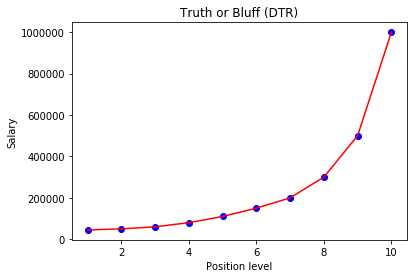

In [9]:
plt.scatter(X, y, color = 'blue')
plt.plot(X, regressor.predict(X), color = 'red')
plt.title('Truth or Bluff (DTR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

# Visualising the DTR results (for higher resolution and smoother curve)

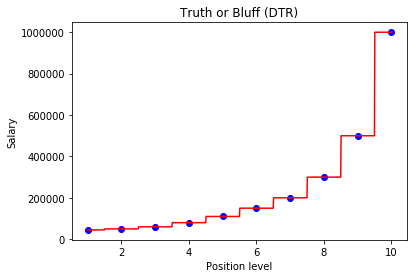

In [11]:
X_grid = np.arange(min(X), max(X), 0.01) 
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'blue')
plt.plot(X_grid, regressor.predict(X_grid), color = 'red')
plt.title('Truth or Bluff (DTR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()